# <center> **Manipulating Histograms**

## **1. Importing data from Google Drive**

In [ ]:
# Montando o drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Processamento Digital de Imagem

/content/drive/MyDrive/Processamento Digital de Imagem


In [ ]:
%cd Manipulando\ histogramas

/content/drive/MyDrive/Processamento Digital de Imagem/Manipulando histogramas


## **2. Importing necessary libraries**

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

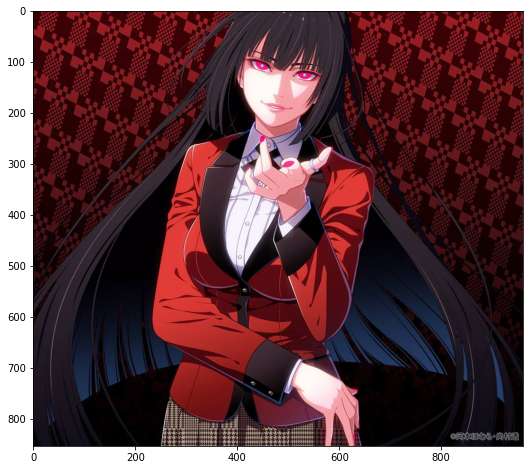

In [ ]:
# Now after we have imported all necessary libraries, we'll be importing the image that will be used in this problem #
# Importing the image in RGB #
img = cv.imread('images/umeko.jpg', cv.COLOR_BGR2RGB)

# ploting image #
plt.subplots(figsize=(15, 8))

# Lendo a imagem #
img = plt.imread('images/umeko.jpg')
# Plotando a imagem #
plt.imshow(img)
plt.show()

## **3. What is an Histogram?**

Basically histogram is a type of graph that can show us the frequency of certain values (how much that values appears in our data), in the case of an image, the histogram we'll show us the frequency of shades of colors appears in our image. In next steps we'll show the histogram of colors of Yumeko Jabami from kakegurui :D.

### **3.1 Obtaining image's values and creating a histogram with Matplotlib**

In [ ]:
# Shape of our image #
img = cv.imread('images/umeko.jpg', cv.COLOR_BGR2RGB)
print(img.shape)

# R G B #

# Red #
red = img[:, :, 0]
#red = np.reshape(red, (1,-1))
histR, bins = np.histogram(red, bins=256, range=(0, 256))

# Green #
green = img[:, :, 1]
#green = np.reshape(green, (1,-1))
histG, bins = np.histogram(green, bins=256, range=(0, 256))

# Blue #
blue = img[:, :, 2]
#blue = np.reshape(blue, (1,-1))
histB, bins = np.histogram(blue, bins=256, range=(0, 256))

(853, 960, 3)


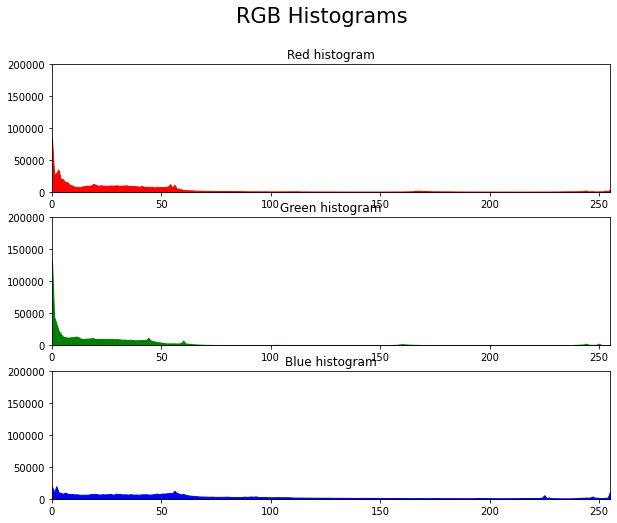

In [ ]:
# Plottig # 

f, ax = plt.subplots(3, 1, figsize=(10, 8))

#ax[0].plot(bins[:-1], histR, color = 'r')
#ax[1].plot(bins[:-1], histG, color = 'g')
#ax[2].plot(bins[:-1], histB, color = 'b')

ax[0].fill_between(bins[:-1], histR, color = 'r')
ax[1].fill_between(bins[:-1], histG, color = 'g')
ax[2].fill_between(bins[:-1], histB, color = 'b')


ax[0].set_xlim([0, 255])
ax[1].set_xlim([0, 255])
ax[2].set_xlim([0, 255])

ax[0].set_ylim([0, 200000])
ax[1].set_ylim([0, 200000])
ax[2].set_ylim([0, 200000])

ax[0].set_title("Red histogram")
ax[1].set_title("Green histogram")
ax[2].set_title("Blue histogram")


plt.suptitle("RGB Histograms", size = 21)
plt.show()

### **3.2 Plotting histograms with OpenCV**

In [ ]:
# Open image
img = cv.imread('images/umeko.jpg', cv.COLOR_BGR2RGB)

for i in bins[:-1]:
    value = 300 - int(histR[int(i)]/1000)
    cv.line(img, (int(i), 300), (int(i), value), (0, 0, 255), 1)
    value = 200 - int(histG[int(i)]/1000)
    cv.line(img, (int(i), 200), (int(i), value), (0, 255, 0), 1)
    value = 100 - int(histR[int(i)]/1000)
    cv.line(img, (int(i), 100), (int(i), value), (255, 0, 0), 1)

# Saving the imae with histograms #
cv.imwrite('images/yumekoHist.jpg', img)
    
# Showing the image in a new tab #
cv.imshow('Jabami Yumeko', img)

# necessary code to avoid the python's kernel to crash #
cv.waitKey(0)
cv.destroyAllWindows()

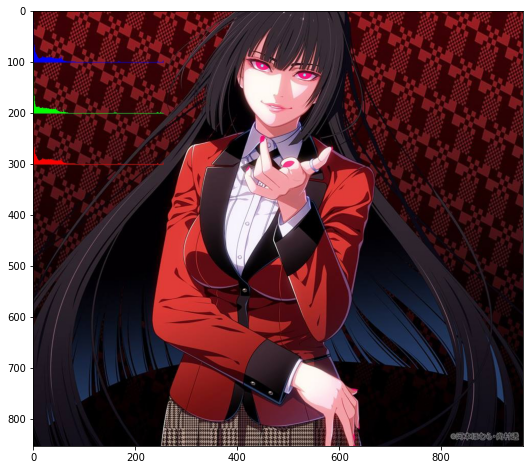

In [ ]:
plt.subplots(figsize=(15, 8))

# Reading the image #
img = plt.imread('images/yumekoHist.jpg', 0)

# Plotting #
plt.imshow(img)
plt.show()

## **4. Equalizing Histograms**

First we'll be doing all the work just for Red values from the image, and after we explain everything we'll be doing for all RGB values.

To calculate the equalized histogram we need to follow some steps:

* First we need to calculate the Probability Density Function of the original histogram. To do this we need to get every value of the original histogram and divide by the image's size.
* The second step is to calculate the Cumulative Density Function.
* The final step is to multiply every value by ```number_of_bits - 1``` and then round each value.

In [ ]:
# Now after we have imported all necessary libraries, we'll be importing the image that will be used in this problem #
# Importing the image in RGB #
img = cv.imread('images/umeko.jpg', cv.COLOR_BGR2RGB)

# Red levels #

red = img[:, :, 0]
histR, bins = np.histogram(red, bins=256, range=(0, 256))

### **4.1 Calculating the Probability Density Function - PDF**


In [ ]:
# PDF #

img_size = img.shape[0]*img.shape[1]
pdf = [0] * 256

for i in range(0, 256):
    pdf[i] = histR[i]/img_size

### **4.2 Calculating the Cumulative Density Function - CDF**

In [ ]:
# CDF #

cdf = [0] * 256
cdf[0] = pdf[0]

for i in range(1, 256):
    cdf[i] = cdf[i-1] + pdf[i]

### **4.3 New Histogram Values**

In [ ]:
# new Hist values #

new_Hist = [0] * 256

for i in range(0, 256):
    new_Hist[i] = int((cdf[i] * 255) + 1)

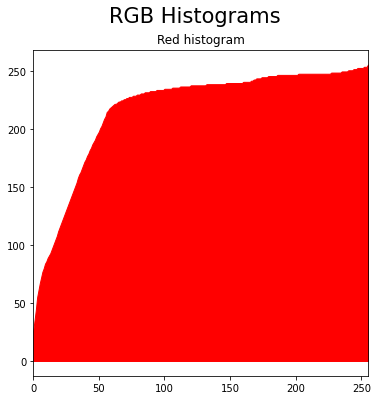

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))

plt.fill_between(bins[:-1], new_Hist, color = 'r')

plt.xlim([0, 255])
plt.title("Red histogram")

plt.suptitle("RGB Histograms", size = 21)
plt.show()

In [ ]:
for i in range(0, red.shape[0]):
    for j in range(0, red.shape[1]):
        for k in range(0, 256):
            if(red[i][j] == k):
                red[i][j] = new_Hist[k]
                break

In [ ]:
img[:, :, 0] = red

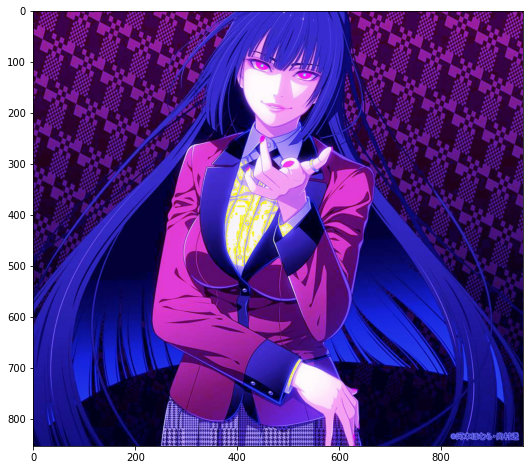

In [ ]:
cv.imwrite('images/yumekoEqua_Red.jpg', img)

plt.subplots(figsize=(15, 8))

# Reading the image #
img = plt.imread('images/yumekoEqua_Red.jpg')

# Plotting #
plt.imshow(img)
plt.show()

## **5. Creating a Function to Equalize all RGB values from the image**

In this section we'll transform what we've made into a function, and we'll otimze the mapping in the section **4.3**, because this mapping procedure takes so much time to execute.

In [ ]:
def equalizeHistRed(img_):
    
    img = img_.copy()
    
    # Getting red values
    red = img[:, :, 0]
    histR, bins = np.histogram(red, bins=256, range=(0, 256))
    
    img_size = img.shape[0]*img.shape[1]
    
    # PDF #

    pdfR = [0] * 256
    
    for i in range(0, 256):
        pdfR[i] = histR[i]/img_size
        
    # CDF #
    
    cdfR = [0] * 256
    cdfR[0] = pdfR[0]
    
    for i in range(1, 256):
        cdfR[i] = cdfR[i-1] + pdfR[i]
     
    # new Histogram #
    
    new_histR = [0] * 256
    
    cdfR = [i* 255 for i in cdfR]
    
    new_histR = np.floor(cdfR).astype('uint8')
    
    red_list = list(red.flatten())
    
    n_red_list = [new_histR[i] for i in red_list]
    
    red = np.reshape(np.asarray(n_red_list), red.shape)
            
    img[:, :, 0] = red
            
    return img

In [ ]:
def equalizeHistGreen(img_):
    
    img = img_.copy()
    
    green = img[:, :, 1]
    histG, bins = np.histogram(green, bins=256, range=(0, 256))
    
    img_size = img.shape[0]*img.shape[1]
    
    # PDF #
    
    pdfG = [0] * 256
    
    for i in range(0, 256):
        pdfG[i] = histG[i]/img_size
        
    # CDF #
    
    cdfG = [0] * 256
    
    cdfG[0] = pdfG[0]
    
    for i in range(1, 256):
        cdfG[i] = cdfG[i-1] + pdfG[i]
        
    # new Histogram #
    
    new_histG = [0] * 256
    
    cdfG = [i* 255 for i in cdfG]
    
    new_histG = np.floor(cdfG).astype('uint8')
    
    green_list = list(green.flatten())
    
    n_green_list = [new_histG[i] for i in green_list]
    
    green = np.reshape(np.asarray(n_green_list), green.shape)
    
    img[: ,:, 1] = green
            
    return img

In [ ]:
def equalizeHistBlue(img_):
    
    img = img_.copy()
    
    # Getting Blue values
    blue = img[:, :, 2]
    histB, bins = np.histogram(blue, bins=256, range=(0, 256))
    
    img_size = img.shape[0]*img.shape[1]
    
    # PDF #

    pdfB = [0] * 256
    
    for i in range(0, 256):
        pdfB[i] = histB[i]/img_size
        
    # CDF #
    
    cdfB = [0] * 256
    cdfB[0] = pdfB[0]
    
    for i in range(1, 256):
        cdfB[i] = cdfB[i-1] + pdfB[i]
     
    # new Histogram #
    
    new_histB = [0] * 256
    
    cdfB = [i* 255 for i in cdfB]
    
    new_histB = np.floor(cdfB).astype('uint8')
    
    blue_list = list(blue.flatten())
    
    n_blue_list = [new_histB[i] for i in blue_list]
    
    blue = np.reshape(np.asarray(n_blue_list), blue.shape)

    img[:, :, 2] = blue
            
    return img

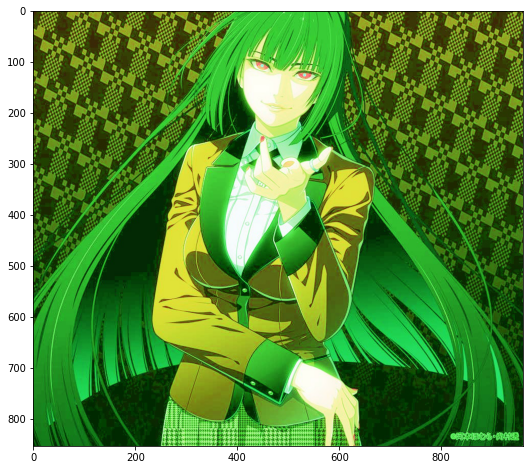

In [ ]:
# Importing the image in RGB #
img = cv.imread('images/umeko.jpg', cv.COLOR_BGR2RGB)

new_img = equalizeHistGreen(img)

cv.imwrite('images/yumeko_Equa.jpg', new_img)

plt.subplots(figsize=(15, 8))

# Reading the image #
img = plt.imread('images/yumeko_Equa.jpg')

# Plotting #
plt.imshow(img)
plt.show()

## **6. Equalizing Grayscale images**

In [ ]:
def equalizeHist(img_):
    
    img = img_.copy()
    
    hist, bins = np.histogram(img, bins=256, range=(0, 256))
    
    img_size = img.shape[0]*img.shape[1]
    
    # PDF #

    pdf = [0] * 256
    
    for i in range(0, 256):
        pdf[i] = hist[i]/img_size
     
    
    # CDF #
    
    cdf = [0] * 256
    cdf[0] = pdf[0]
    
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + pdf[i]
    
    # new Histogram #
    
    new_hist = [0] * 256
    
    cdf = [i* 255 for i in cdf]
    
    new_hist = np.floor(cdf).astype('uint8')
    
    _list = list(img.flatten())
    
    n_list = [new_hist[i] for i in _list]
    
    img = np.reshape(np.asarray(n_list), img.shape)

    return img

In [ ]:
# Importing the image in RGB #
img = cv.imread('images/umeko.jpg', 0)

new_img = equalizeHist(img)

# Saving the imae with histograms #
cv.imwrite('images/yumekoEqua.jpg', new_img)

# Showing the new image in a new tab #
cv.imshow('Jabami Yumeko new', new_img)
cv.imshow('Jabami Yumeko', img)

# necessary code to avoid the python's kernel to crash #
cv.waitKey(0)
cv.destroyAllWindows()

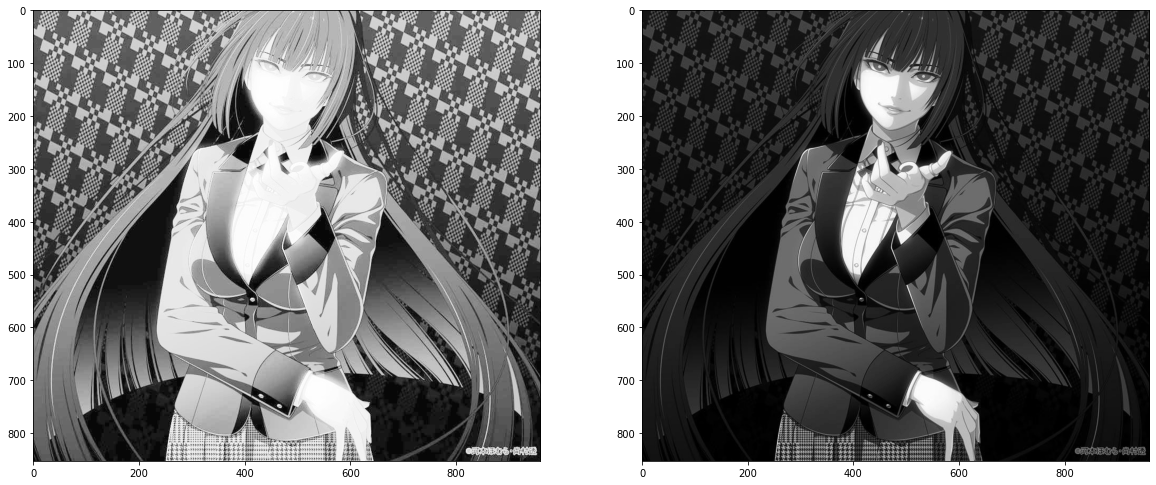

In [ ]:
# plotting results #
new_img = plt.imread('images/yumekoEqua.jpg')
img = Image.open('images/umeko.jpg').convert("L")  # for RGB images, need to convert #
img = np.asarray(img)

f, ax = plt.subplots(1, 2, figsize=(20, 15))

# Plotando a imagem #
ax[0].imshow(new_img, cmap = 'gray')
ax[1].imshow(img, cmap = 'gray')
plt.show()

## **6.1 Using camera**

Using OpenCV camera and calculating the equalizate histogram in almost real time.

!!!!Cannot be openned in google colab!!!

In [ ]:
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    gray_ = equalizeHist(gray)
    # Display the resulting frame
    cv.imshow('frame', gray)
    cv.imshow('frame equ', gray_)
    if cv.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

## **7. Detecting moviment with histogram**

To create a moviment detection it has been created an auxiliar function to minimize the sensibility of the motion detection. If we just created a function that calculates the difference between histograms its would be too sensible, so, to avoid this were created a function that calculated if the diference between two histogram's values are too big, if are not too big, the program will not display "Moviment detected!".

In [ ]:
# we already made the code to calculate the histogram of the img #

def calcHist(img_):
    
    img = img_.copy()
    
    hist, bins = np.histogram(img, bins=256, range=(0, 256))
     
    return hist

In [ ]:
# We need to crete a function that calculates if two value has a huge difference #

def calcDiff(value1, value2, range_):
    
    diff = value2 - value1
    
    if(diff < 0):
        diff = diff * (-1)
    
    if(diff >= range_):
        return True
    elif(diff < range_):
        return False

In [ ]:
# New and old histogram #
import collections 
cap = cv.VideoCapture(0)

ret, frame = cap.read()
gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
# actual_hist = calcHist(gray)
previous_hist = calcHist(gray)


if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Check Moviment #
    actual_hist = calcHist(gray)
    #if collections.Counter(actual_hist) != collections.Counter(previous_hist):
    #    print("Moviment Detected!")
    counter = 0
    for i in range(actual_hist.shape[0]):
        #if(actual_hist[i] != previous_hist[i]):
        if(calcDiff(actual_hist[i], previous_hist[i], 100)):
            counter += 1
    if(counter >= 80):
        print("Moviment Detected!")
    previous_hist = actual_hist.copy()
        
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()